### Serie de Fourier exponencial discreta

Sea x(n) una señal aperiódica discreta en el tiempo, la transformada discreta de Fourier (DFT) de esta señal se define como:

$$X[k]= \sum_{n=0}^{N-1} x[n]\,e^{-j 2\pi n \frac{k}{N}}$$

en la cual X(k) es un conjunto de números complejos. 

La evaluación directa de esa fórmula requiere $N^{2}$ operaciones aritméticas, pero con un algoritmo FFT se puede obtener el mismo resultado con sólo $N log N$ operaciones.


$$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k]\cdot e^{i 2 \pi k \frac{n}{N}}$$

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

import matplotlib.pyplot as plt
import numpy as np


from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 16,
          'figure.figsize': (10, 8),
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
plt.rcParams.update(params) 

from scipy.fftpack import fft, fftfreq
from time import time

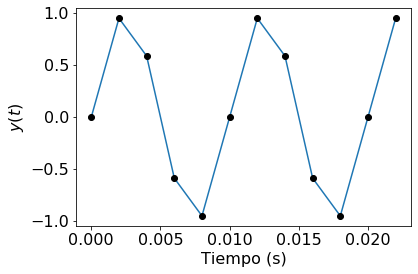

In [33]:
Np = 2.3

f  = 100     # Hz
T  = Np*  (1/f)
fs = 500# muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t  = np.arange(0, T, dt)  # Intervalo de tiempo en segundos 
Nt= len(t)
y  = np.sin(2 * pi * f * t)   # Señal

plt.plot(t, y)
plt.plot(t, y, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()



/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


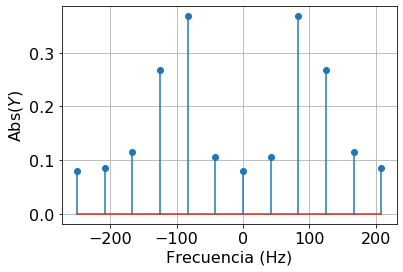

In [34]:
#start_time = time()
Y = fft(y) / Nt  # Normalizada

#elapsed_time = time() - start_time
#print("Elapsed time: %.10f seconds." % elapsed_time)

frq  = fftfreq(Nt, dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

/home/aalmela/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


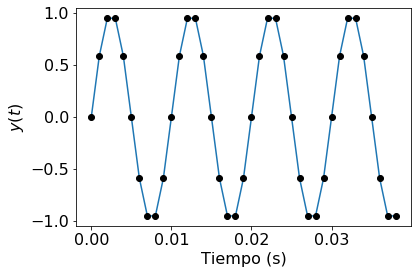

In [43]:
# Do an inverse Fourier transform on the signal
yt = np.fft.ifft(Y)*Nt
 

# Plot the original sine wave using inverse Fourier transform
plt.plot(t, yt)
plt.plot(t, y, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

## Spectral leakage

Cuando se calcula la transformada discreta de Fourier (DFT) de una señal (por ejemplo, para obtener la densidad espectral de potencia), el manchado espectral o leakage ocurrirá si alguna de las componentes frecuenciales cae entre frecuencias de referencia.

El leakage también tiene lugar cuando se calcula la DFT de una señal que contiene el resto de un ciclo. Por ejemplo, si una onda senoidal de 3 Hz se muestrea durante 0.9 segundos, se produce una discontinuidad, la cual causa un manchado espectral. 


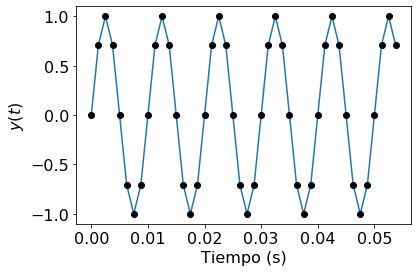

Elapsed time: 0.0003614426 seconds.


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


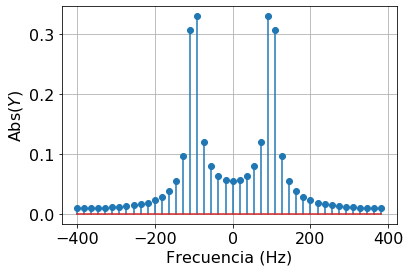

In [26]:
Nt = 44        # Número de bines
f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t  = np.linspace(0, (Nt - 1) * dt, Nt)  # Intervalo de tiempo en segundos 

y  = np.sin(2 * pi * f * t)   # Señal

plt.plot(t, y)
plt.plot(t, y, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

start_time = time()
Y = fft(y) / Nt  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq  = fftfreq(Nt, dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, 1.4)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

## Zero Padding


Zero padding es una tecnica empleada con el objetivo de tener ventanas con numeros de bines multiplos de 2. Para ello se agregan ceros al final de la muestra.

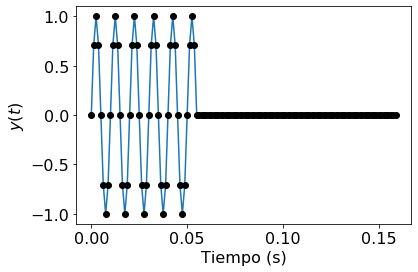

Elapsed time: 0.0001928806 seconds.


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


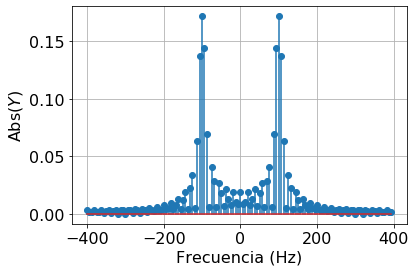

In [27]:
Nt = 128        # Número de bines
Ns = 44
f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t  = np.linspace(0, (Nt - 1) * dt, Nt)  # Intervalo de tiempo en segundos 


y  = np.sin(2 * pi * f * t[:Ns])   # Señal
y  = np.append(y, np.zeros(Nt-Ns) )

plt.plot(t, y)
plt.plot(t, y, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

start_time = time()
Y = fft(y) / Nt  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq  = fftfreq(Nt, dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, 1.4)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

## Ventanas 

Existe una manera de reducir la fuga y es mediante el uso de funciones ventana. Las funciones ventana no son más que funciones que valen cero fuera de un cierto intervalo, y que en procesamiento de señales digitales se utilizan para «suavizar» o filtrar una determinada señal. NumPy trae unas cuantas funciones ventana por defecto; por ejemplo, la ventana de Blackman tiene este aspecto


Como se puede ver, en los extremos del intervalo es nula. Las funciones ventana reciben un único argumento que es el número de puntos. Si multiplicamos la ventana por la señal, obtenemos una nueva señal que vale cero en los extremos. Comprobemos el resultado, representando ahora el espectro de amplitud y comparando cómo es el resultado si aplicamos o no la ventana de Blackman.

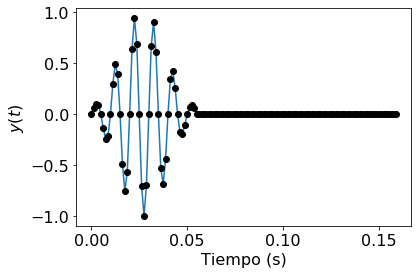

Elapsed time: 0.0001847744 seconds.


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


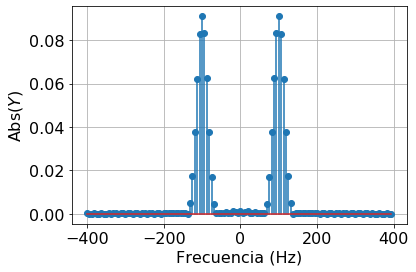

In [18]:
Nt = 128
Ns = 44         # Número de bines

f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t4  = np.linspace(0, (Nt - 1) * dt, Nt)  # Intervalo de tiempo en segundos 

y4 = np.sin(2 * pi * f * t4[:Ns])   # Señal


#y4 = y4 * np.bartlett(Ns)
#y4 = y4 * np.blackman(M) 
y4 = y4 * np.hamming(M) 
#y4 = y4 * np.hanning(M) 
#y4 = y4 * np.kaiser(M, 10) 

y4  = np.append(y4, np.zeros(Nt-Ns) )

plt.plot(t4, y4)
plt.plot(t4, y4, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

start_time = time()
Y4 = fft(y4) / Nt  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq4 = fftfreq(Nt, dt)  # Recuperamos las frecuencias

plt.stem(frq4, np.abs(Y4) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, .8)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

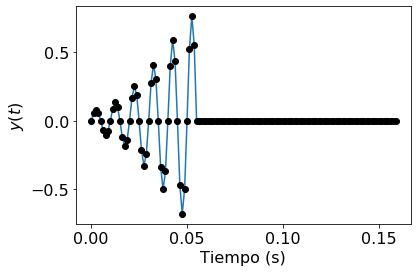

Elapsed time: 0.0076992512 seconds.


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


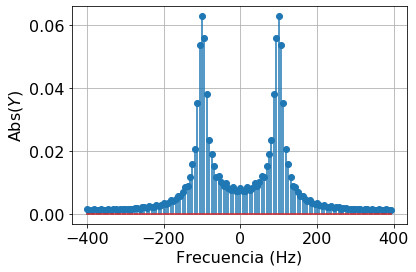

In [19]:
Nt = 128
Ns = 44         # Número de bines

f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t4  = np.linspace(0, (Nt - 1) * dt, Nt)  # Intervalo de tiempo en segundos 

y4 = np.sin(2 * pi * f * t4[:Ns])   # Señal

y4  = np.append(y4, np.zeros(Nt-Ns) )

#y4 = y4 * np.bartlett(Nt)
#y4 = y4 * np.blackman(Nt) 
y4 = y4 * np.hamming(Nt) 
#y4 = y4 * np.hanning(Nt) 
#y4 = y4 * np.kaiser(Nt, 10) 


plt.plot(t4, y4)
plt.plot(t4, y4, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

start_time = time()
Y4 = fft(y4) / Nt  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq4 = fftfreq(Nt, dt)  # Recuperamos las frecuencias

plt.stem(frq4, np.abs(Y4) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, .8)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()